<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/tashkent_house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Vazifani CRSIP-DM(Cross Industry Standard Process for Data Mining) Metolodgiyasi yordamida bajarish.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

Kerakli kutubxonalarni chaqirib olamiz!

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Datasetni githubdan yuklab olamiz!

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanj0n/Datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


### Dataset haqida tushunchalarga ega bo'lamiz!

In [12]:
# Dataset nechta ustun va qatordan iboratligi
df.shape


(7565, 7)

In [13]:
# Dataset haqida umumiy ma'lumotlar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


Dataset haqida ma'lumot
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy **narxi**

Biz model yaratayotganimizda asosan raqamli ustunlar bilan ishlaymiz. <br>
Ko'rishimiz mumkinki bizda 3 ta raqamli ustunlar bor.Ammo yana *size* va *price* ustunlari ham raqamli ustun bo'lishi zarur. <br>
Keling shu ustunlarni raqamli ustunlarga o'tqazishga harakat qilamiz.

In [16]:
df["size"].astype(float)

ValueError: ignored

**Bizda hatolik!** <br>
Bizda `'Площадьземли:1сот'` ma'lumotga ega qator, shu ustunni *float*ga o'tkazishimizga halaqit beryabdi. Bu maydon 1 sotix ekan. Biz uni 100 kv.m ga o'zgartirib keyin ustunni floatga aylantiramiz.

In [15]:
df[df['size'] == 'Площадьземли:1сот'].index

Int64Index([5347], dtype='int64')

5347 qator, `size` ustunini 100ga tenglashtiramiz

In [17]:
df.loc[5347, "size"] = 100

Endi qayta floatga aylantiramiz!

In [18]:
df["size"]=df["size"].astype(float)

`price` ustunini ham raqamli ustunga aylantiramiz.

In [19]:
df["price"].astype(int)

ValueError: ignored

Bizda yana muammo. `'Договорная'` bor qator halaqit beryabdi. Bizda malumotlar yetarlicha. Shuning bu ustunlarni tashlab yuboramiz.

In [20]:
indeks_price_error = df[df.price == 'Договорная'].index
df.drop(indeks_price_error, inplace=True)

In [22]:
# Endi int malumotlar turiga o'tkazamiz
df["price"]=df["price"].astype(int)

In [23]:
# raqamli ustunlar haqida statistik ma'lumotlar
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.535205,3.693678,6.023841,7.133421e+04
std,1.083200,1501.057455,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


### Datasetni tozalash

In [25]:
# dataset nan qiymatlari soni
df.isna().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [30]:
# takror qiymatlar soni
df.duplicated().sum()

697

In [31]:
# takrorlangan qiymatlarni tashlab yuboramiz
df.drop_duplicates(inplace=True)
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000


### Noodatiy qiymatlar bilan ishlash

In [33]:
df.describe()

,rooms,size,level,max_levels,price
count,6769.000000,6769.000000,6769.000000,6769.000000,6.769000e+03
mean,2.623283,117.815531,3.706160,6.041217,7.272632e+04
std,1.075144,1576.342755,2.255495,2.619584,6.724414e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07



Ko'rishimiz mumkinki bizda bir nechta noodatiy qiymatlarni mavjud.
1.   Uy maydoni hech qachon 1 kv.m yoki 70000 kv.m bo'lishimiz mumkin emas.
2.   Uy narxida ham shunga o'xshash muammolar bor. Masalan, uy narxi hech qachon 2 $ bo'lmaydi.



Barcha noodatiy qiymatlarni tashlab yuboramiz!

In [36]:
# maydoni 10 kv.m dan kam bo'lgan qatorlar
df[df['size']<10]

,location,district,rooms,size,level,max_levels,price
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.0,1,3,26000
4337,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,5.0,4,5,46600
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.8,2,2,90000
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.0,2,5,35000


In [44]:
# maydoni 500 kv.m dan ko'p bo'lgan qatorlar
df[df['size']>=500]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000


In [48]:
# size ustuni bo'yicha noodatiy qiymatlarni tashlab yuboramiz
mask_size = (df['size']>=500) | (df['size']<10)
df.drop(df[mask_size].index, inplace=True)

In [71]:
df[df["price"]>400_000]

,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000
741,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3,84.0,1,5,3780000
1999,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,300.0,3,8,425000
3163,"город Ташкент, Мирзо-Улугбекский район, Кори Н...",Мирзо-Улугбекский,4,200.0,2,7,500000
3625,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,225.0,5,8,530000
3656,"город Ташкент, Мирзо-Улугбекский район, Дархан",Мирзо-Улугбекский,5,336.0,8,9,504000
4926,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,2,64.0,1,5,420000


In [69]:
df[df["price"]<5_000]

,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2
7333,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,30.0,2,4,2400


Berilgan narxlar boshqa ma'lumotlar bilan to'g'ri kelmayabdi. Shuning uchun bu qatorlarni ham tashlab yuboramiz.

In [77]:
mask_price = (df["price"]>400_000) | (df["price"]<5_000)
df.drop(df[mask_price].index, inplace=True)

### Datasetni vizualizatsiya orqali tahlil qilamiz.

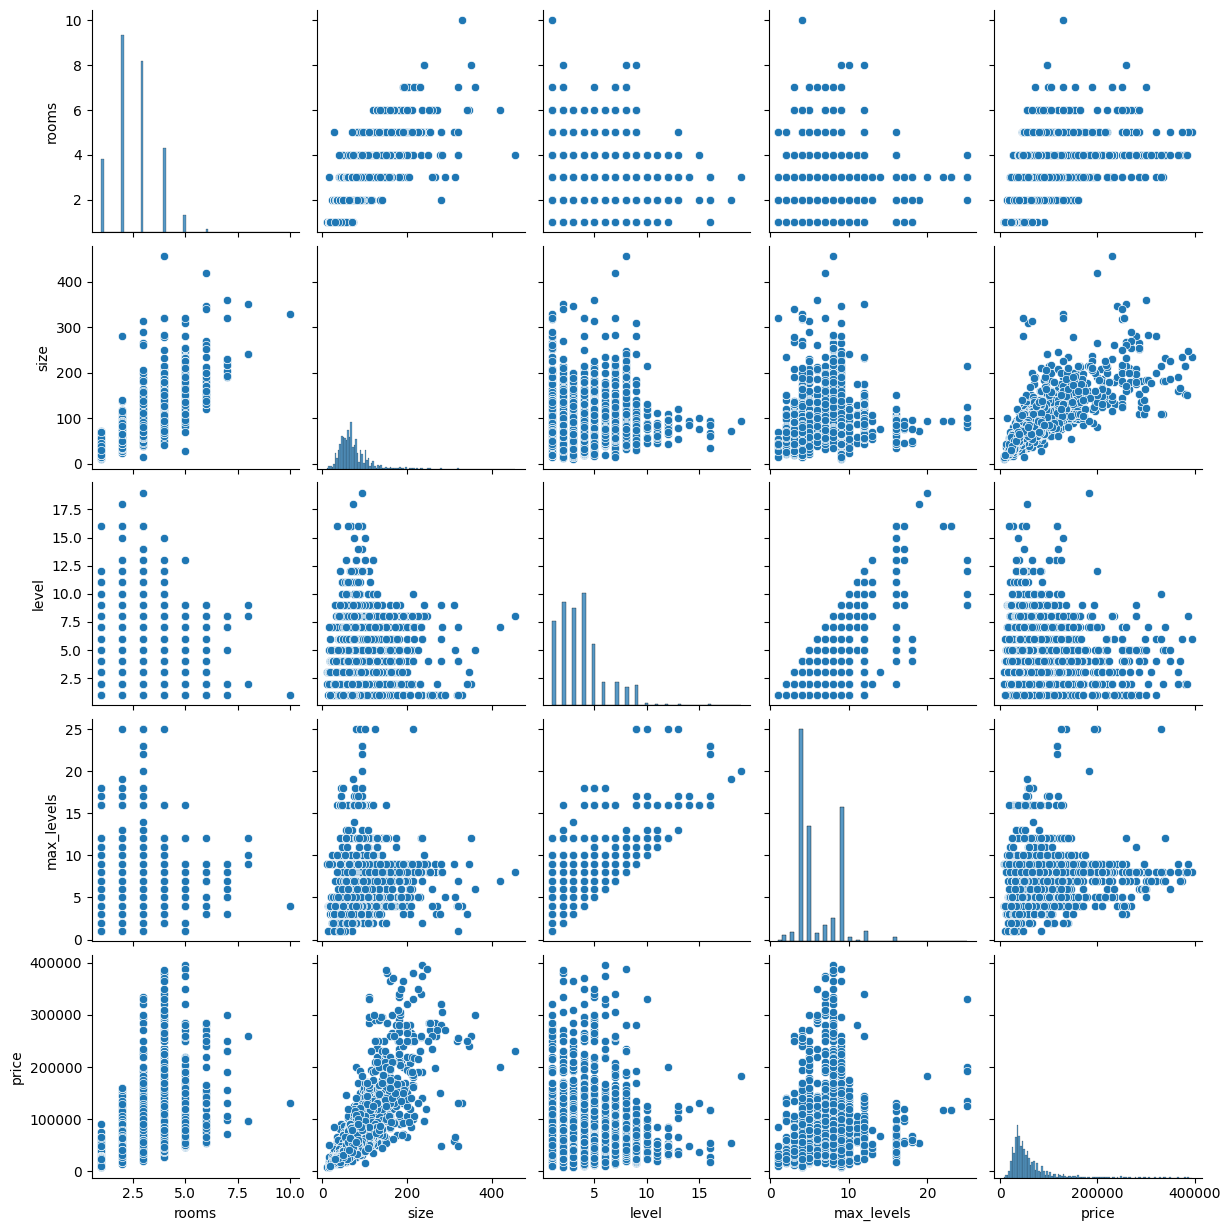

In [83]:
sns.pairplot(df)
plt.show()

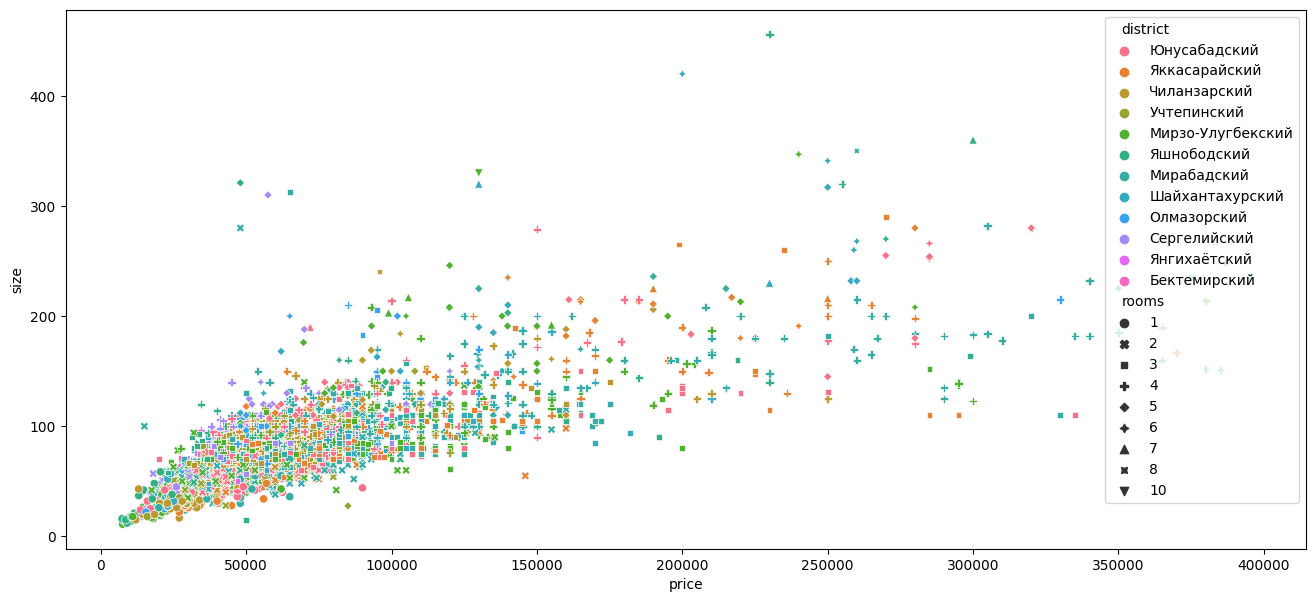

In [93]:
plt.figure(figsize=[16,7])
sns.scatterplot(data=df, x="price",y="size", hue="district", style="rooms" )
plt.show()

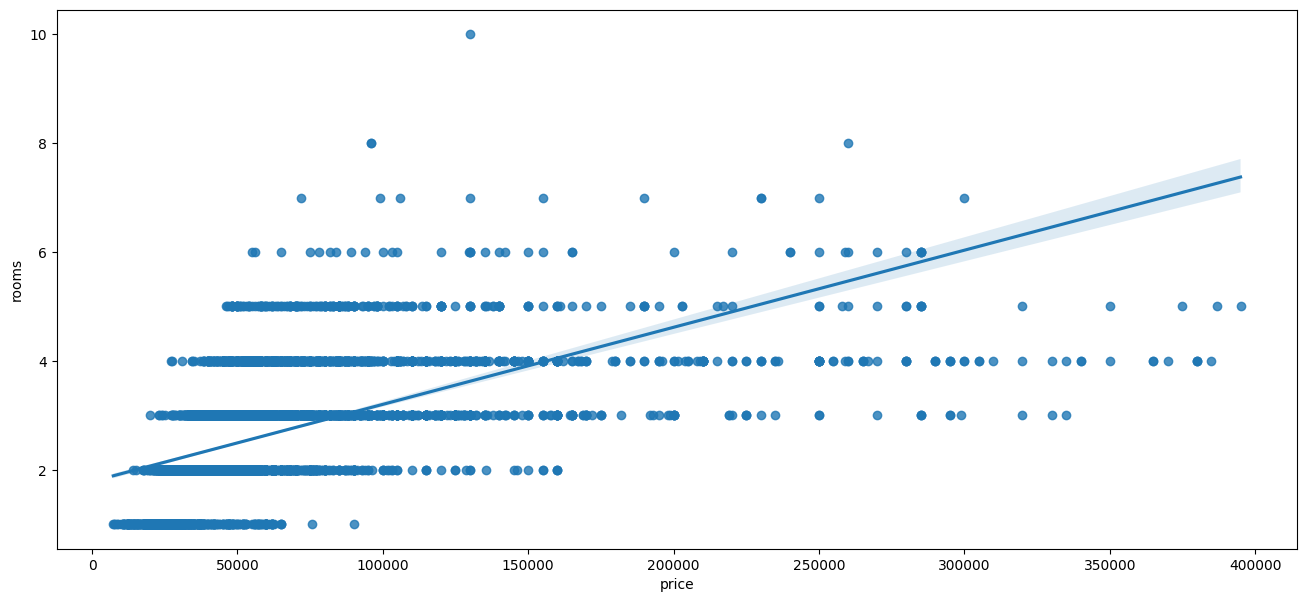

In [90]:
plt.figure(figsize=[16,7])
sns.regplot(data=df, x="price",y="rooms" )
plt.show()

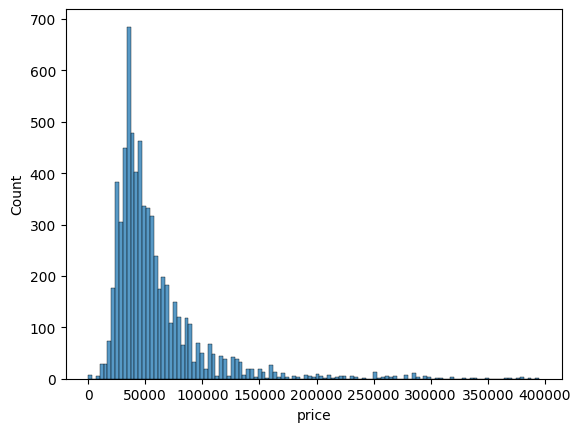

In [62]:
sns.histplot(df[df["price"]<400_000], x="price")
plt.show()

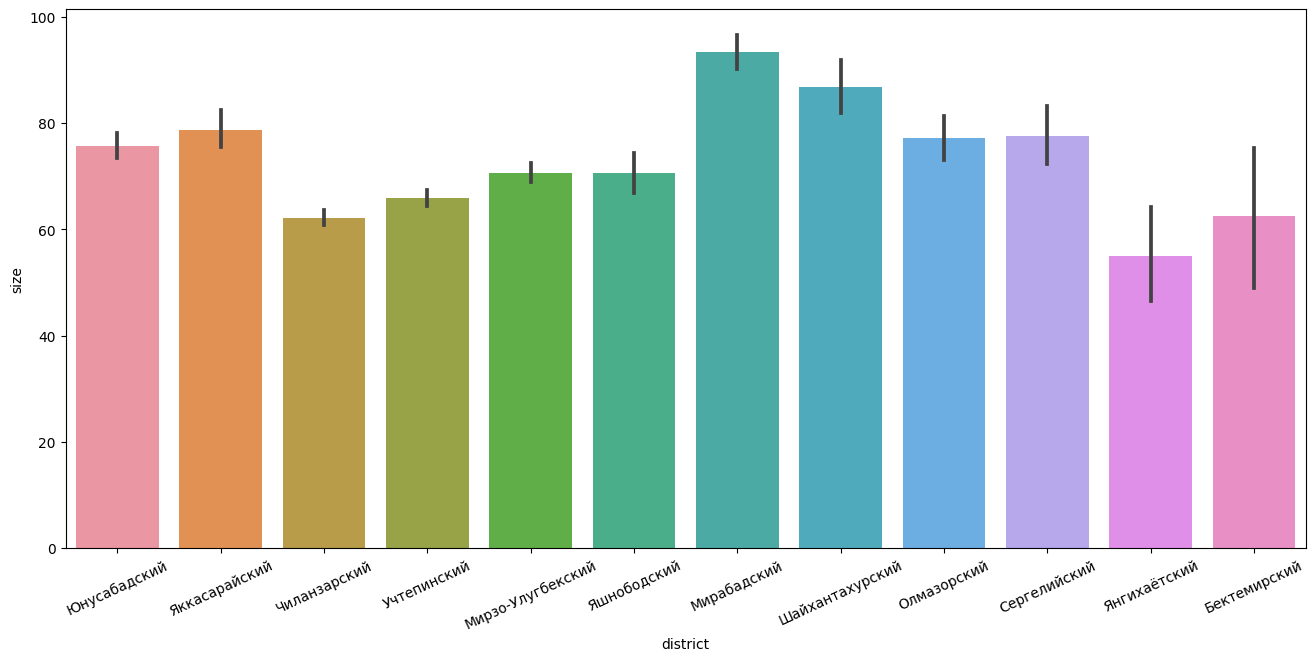

In [87]:
plt.figure(figsize=[16,7])
sns.barplot(data=df, x="district",y="size")
plt.xticks(rotation=25)
plt.show()

In [96]:
# dataset ustunlari o'rtasidagi corralations
df.corr()

<ipython-input-96-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rooms,size,level,max_levels,price
rooms,1.000000,0.781322,0.141662,0.186614,0.563664
size,0.781322,1.000000,0.168730,0.283954,0.794978
level,0.141662,0.168730,1.000000,0.597505,0.070353
max_levels,0.186614,0.283954,0.597505,1.000000,0.240480
price,0.563664,0.794978,0.070353,0.240480,1.000000


<ipython-input-99-862049394a5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues", square=True)


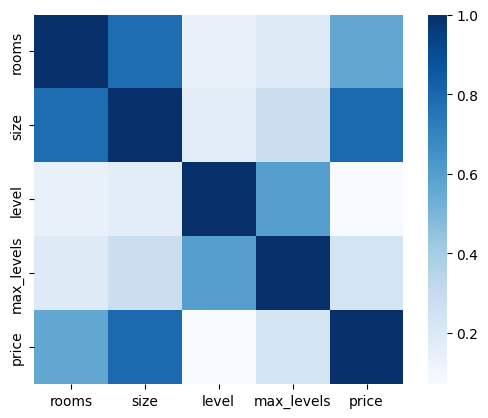

In [99]:
sns.heatmap(df.corr(), cmap="Blues", square=True)
plt.show()

Ko'rib turibmizki **price** ustuni bilan **size** va **rooms** ustunlari bilan yaxshi correlatsiyaga ega ekan.

Yana bir narsa, bizga location ustuni deyarli kerak emas bizga(I think). Shuning uchun bu ustunni tashlab yuboramiz.

In [104]:
df.drop("location", axis=1, inplace=True)

### Datasetni MACHINE LEARNING ga tayyorlash

In [105]:
# datasetni train va test setlarga ajratib olamiz
from sklearn.model_selection import train_test_split
train_set, test_set =  train_test_split(df, test_size=0.2, random_state=42)

In [107]:
train_set

,district,rooms,size,level,max_levels,price
430,Яккасарайский,2,62.0,8,9,42000
3958,Шайхантахурский,3,78.0,3,5,51000
1567,Юнусабадский,3,77.0,3,5,40000
925,Учтепинский,2,50.0,4,4,37500
2273,Мирзо-Улугбекский,1,40.0,4,4,25000
...,...,...,...,...,...,...
4097,Чиланзарский,2,60.0,2,4,38000
5766,Яшнободский,2,40.0,1,4,28000
5803,Яккасарайский,2,53.0,5,8,43500
6001,Чиланзарский,2,50.0,1,4,34500


In [108]:
test_set

,district,rooms,size,level,max_levels,price
2818,Яккасарайский,2,83.0,4,8,77000
481,Мирзо-Улугбекский,3,90.0,2,9,51000
3464,Чиланзарский,3,67.0,4,4,36500
3103,Мирзо-Улугбекский,3,75.0,4,4,68000
1992,Мирзо-Улугбекский,3,90.0,4,7,55500
...,...,...,...,...,...,...
1988,Чиланзарский,2,50.0,2,4,46000
688,Сергелийский,3,80.0,2,5,45000
174,Мирзо-Улугбекский,3,70.0,5,5,37000
2255,Мирабадский,5,235.0,6,7,375000


In [139]:
# Matnli ustunni raqamli ustunga aylantirib yangi dataset yasovchi funksiya. Yani har bir district ustuni unique value lari uchun bitta tartib raqam beriladi.
def prepared_set(df):
  df_num = df.drop("district", axis=1)
  df_str = df[["district"]]
  from sklearn.preprocessing import OrdinalEncoder
  ordinal_encoder = OrdinalEncoder()
  arr = ordinal_encoder.fit_transform(df_str)
  df_str_num = pd.DataFrame(arr, index= df.index, columns=["district"])
  return pd.concat([df_num, df_str_num], axis=1)


In [140]:
prepared_train = prepared_set(train_set)
prepared_train

,rooms,size,level,max_levels,price,district
430,2,62.0,8,9,42000,9.0
3958,3,78.0,3,5,51000,7.0
1567,3,77.0,3,5,40000,8.0
925,2,50.0,4,4,37500,5.0
2273,1,40.0,4,4,25000,2.0
...,...,...,...,...,...,...
4097,2,60.0,2,4,38000,6.0
5766,2,40.0,1,4,28000,11.0
5803,2,53.0,5,8,43500,9.0
6001,2,50.0,1,4,34500,6.0


In [141]:
prepared_test = prepared_set(test_set)
prepared_test

,rooms,size,level,max_levels,price,district
2818,2,83.0,4,8,77000,9.0
481,3,90.0,2,9,51000,2.0
3464,3,67.0,4,4,36500,6.0
3103,3,75.0,4,4,68000,2.0
1992,3,90.0,4,7,55500,2.0
...,...,...,...,...,...,...
1988,2,50.0,2,4,46000,6.0
688,3,80.0,2,5,45000,4.0
174,3,70.0,5,5,37000,2.0
2255,5,235.0,6,7,375000,1.0


In [142]:
# datasetni o'zgaruvchilar va label larga ajratadigan funksiya
def prepared_X_Y(df):
  df_x = df.drop("price", axis=1)
  df_y = df[["price"]]
  return df_x, df_y

In [145]:
# train va test setlarni o'zgaruvchilar va label larga ajratadib olamiz
train_X, train_Y = prepared_X_Y(prepared_train)
test_X, test_Y = prepared_X_Y(prepared_test)

### MACHINE LEARNING (ML)

#### LinearRegression

In [148]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [150]:
# Modelga malumotlarni o'qitamiz
LR_model.fit(train_X, train_Y)

LinearRegression()

In [170]:
# Endi test dataseti o'zgaruvchilari orqali price ni prognoz qilib ko'ramiz
predicted_price_lr = np.round(LR_model.predict(test_X))
predicted_price_lr

array([[ 72894.],
       [ 84865.],
       [ 46188.],
       ...,
       [ 51670.],
       [223023.],
       [ 73780.]])

In [171]:
pd.DataFrame({"Predicted price": predicted_price_lr.T[0], "Real price": test_Y.values.T[0]})

,Predicted price,Real price
0,72894.0,77000
1,84865.0,51000
2,46188.0,36500
3,58135.0,68000
4,78336.0,55500
...,...,...
1340,37982.0,46000
1341,67514.0,45000
1342,51670.0,37000
1343,223023.0,375000


#### DecisionTreeRegressor

In [173]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [174]:
# Modelga malumotlarni o'qitamiz
tree_model.fit(train_X, train_Y)

DecisionTreeRegressor()

In [175]:
# Endi test dataseti o'zgaruvchilari orqali price ni prognoz qilib ko'ramiz
predicted_price_tree = np.round(tree_model.predict(test_X))
predicted_price_tree

array([ 75500.,  50000.,  43714., ...,  46333., 395000.,  63500.])

In [176]:
pd.DataFrame({"Predicted price": predicted_price_tree, "Real price": test_Y.values.T[0]})

,Predicted price,Real price
0,75500.0,77000
1,50000.0,51000
2,43714.0,36500
3,51000.0,68000
4,62338.0,55500
...,...,...
1340,35765.0,46000
1341,49200.0,45000
1342,46333.0,37000
1343,395000.0,375000


#### RandomForestRegressor

In [177]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

In [178]:
# Modelga malumotlarni o'qitamiz
RF_model.fit(train_X, train_Y)

<ipython-input-178-5076ce553640>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_Y)


RandomForestRegressor()

In [179]:
# Endi test dataseti o'zgaruvchilari orqali price ni prognoz qilib ko'ramiz
predicted_price_rf = np.round(RF_model.predict(test_X))
predicted_price_rf

array([ 75965.,  56610.,  43205., ...,  46632., 313509.,  63718.])

In [180]:
pd.DataFrame({"Predicted price": predicted_price_rf, "Real price": test_Y.values.T[0]})

,Predicted price,Real price
0,75965.0,77000
1,56610.0,51000
2,43205.0,36500
3,59319.0,68000
4,82850.0,55500
...,...,...
1340,35876.0,46000
1341,53511.0,45000
1342,46632.0,37000
1343,313509.0,375000


### Modelni baxolash
3 ta ML algoritmlaridan foydalandik. Endi qaysi model yaxshiroq va xatolik kamligini tekshiramiz.

In [182]:
from sklearn.metrics import mean_absolute_error
mae_lr = mean_absolute_error(test_Y, predicted_price_lr)
mae_tree = mean_absolute_error(test_Y, predicted_price_tree)
mae_rf = mean_absolute_error(test_Y, predicted_price_rf)

In [184]:
print(f"LinearRegression model o'rtacha xatoligi: {mae_lr}\n")
print(f"DecisionTree model o'rtacha xatoligi: {mae_tree}\n")
print(f"RandomForestRegressor model o'rtacha xatoligi: {mae_rf}")

LinearRegression model o'rtacha xatoligi: 14703.488475836431

DecisionTree model o'rtacha xatoligi: 13768.66691449814

RandomForestRegressor model o'rtacha xatoligi: 11422.436431226766


Ko'rib turibmizki RandomForestRegressor model yaxshiroq ekan bu vaziyatda.

### Modelni saqlab olish

RandomForestRegressor model yaxshiroq bo'lganligi uchun shu modelni saqlab olamiz.

In [185]:
import joblib
filename = "Price_predictor_model.jbl"
joblib.dump(RF_model, filename)

['Price_predictor_model.jbl']

# Tamom!